**Aluno:** Rafhael de Oliveira Martins

**Matrícula:** 1922120012

# Análise Estatística do texto do Plano de Governo dos Candidatos a Presidente do Brasil nas Eleições de 2022

In [1]:
!pip install pdfplumber -q

In [2]:
!pip install Pillow -q

In [3]:
!pip install wordcloud -q

In [4]:
!pip install plotly -q

In [5]:
!pip install nltk -q

In [6]:
# Importe de bibliotecas
import os
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

import pdfplumber
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Variáveis Globais
path = "C:/Users/Usuario/Documents/IESB_2022/7_semestre/nlp"
path_docs = "C:/Users/Usuario/Documents/IESB_2022/7_semestre/nlp/planos_governo/"

path_plano_pdt = path_docs+'Plano_PDT.pdf'
path_plano_dc = path_docs+'Plano_DC.pdf'
path_plano_novo = path_docs+'Plano_NOVO.pdf'
path_plano_pl = path_docs+'plano_PL.pdf'
path_plano_up = path_docs+'Plano_UP.pdf'
path_plano_pt = path_docs+'Plano_PT.pdf'
path_plano_pros = path_docs+'plano_PROS.pdf'
path_plano_ptb = path_docs+'Plano_PTB.pdf'
path_plano_mdb = path_docs+'Plano_MDB.pdf'
path_plano_pcb = path_docs+'Plano_PCB.pdf'
path_plano_uniao = path_docs+'Plano_UNIAOBR.pdf'
path_plano_pstu = path_docs+'Plano_PSTU.pdf'

In [8]:
# Funções úteis ao projeto

def pesquisa_arquivos_diretorio(path_files, extensao_arq):
  """
  Função para pesquisar arquivos com uma extensão de arquivo desejada em um diretório específico.
  """
  arquivos_pesquisados = []
  for arquivo in os.listdir(path_files):
    if re.search('\.' + extensao_arq + "$", arquivo):
      #print(f"O arquivo [{arquivo}] é um '{extensao_arq}'!")
      arquivos_pesquisados.append(arquivo)
  return arquivos_pesquisados

In [40]:
arquivos_pdf = pesquisa_arquivos_diretorio(path_docs, "pdf")
arquivos_pdf

['Plano_DC.pdf',
 'Plano_MDB.pdf',
 'Plano_NOVO.pdf',
 'Plano_PCB.pdf',
 'Plano_PDT.pdf',
 'Plano_PL.pdf',
 'plano_PROS.pdf',
 'Plano_PSTU.pdf',
 'Plano_PT.pdf',
 'Plano_PTB.pdf',
 'Plano_PUP.pdf',
 'Plano_UNIAOBR.pdf']

In [26]:
# plano_pdt = pdfplumber.open('path_plano_pdt')
# plano_dc = pdfplumber.open('path_plano_dc')
# plano_novo = pdfplumber.open('path_plano_novo')
# plano_pl = pdfplumber.open('path_plano_pl')
# plano_up = pdfplumber.open('path_plano_up')
# plano_pt = pdfplumber.open('path_plano_pt')
# plano_pros = pdfplumber.open('path_plano_pros')
# plano_ptb = pdfplumber.open('path_plano_ptb')
# plano_mdb = pdfplumber.open('path_plano_mdb')
# plano_pcb = pdfplumber.open('path_plano_pcb')
# plano_uniao = pdfplumber.open('path_plano_uniao')
# plano_pstu = pdfplumber.open('path_plano_pstu')

In [27]:
def lerPDF(path_plano):
  plano_candidato = pdfplumber.open(path_docs+path_plano)
  return plano_candidato

def metadadosPlano(plano):
  print("### Metadados ###")
  return plano.metadata

def quantidadePaginas(plano):
    
    print(f"### Quantidade de páginas ###\n{len(plano.pages)}")

def main(path_plano):
  plano_candidato = lerPDF(path_plano)
  #print("### Metadados ###")
  #plano_candidato.metadata
  #metadadosPlano(plano_candidato)
  print()
  quantidadePaginas(plano_candidato)
  print()
  print()
  print()
  print()

In [27]:
def main(path_plano):
    qtd_pags = []
    plano_candidato = pdfplumber.open(path_docspath_plano)
    print(f"### Quantidade de páginas ###\n{len(plano_candidato.pages)}")
    qtd_pags.append([path_plano, len(plano_candidato.pages)])
    return qtd_pags

In [41]:
qtd_pags = []
for plano in arquivos_pdf:
    plano_candidato = pdfplumber.open(path_docs+plano)
    print(f"### Quantidade de páginas ###\n{len(plano_candidato.pages)}")
    qtd_pags.append([plano, len(plano_candidato.pages)])

qtd_pags

### Quantidade de páginas ###
9
### Quantidade de páginas ###
48
### Quantidade de páginas ###
36
### Quantidade de páginas ###
19
### Quantidade de páginas ###
26
### Quantidade de páginas ###
48
### Quantidade de páginas ###
108
### Quantidade de páginas ###
26
### Quantidade de páginas ###
21
### Quantidade de páginas ###
12
### Quantidade de páginas ###
12
### Quantidade de páginas ###
73


[['Plano_DC.pdf', 9],
 ['Plano_MDB.pdf', 48],
 ['Plano_NOVO.pdf', 36],
 ['Plano_PCB.pdf', 19],
 ['Plano_PDT.pdf', 26],
 ['Plano_PL.pdf', 48],
 ['plano_PROS.pdf', 108],
 ['Plano_PSTU.pdf', 26],
 ['Plano_PT.pdf', 21],
 ['Plano_PTB.pdf', 12],
 ['Plano_PUP.pdf', 12],
 ['Plano_UNIAOBR.pdf', 73]]

In [50]:
df = pd.DataFrame (qtd_pags, columns = ['NOME_PLANO_AUX', 'QTD_PAGS'])
df

NOME_PLANO_AUX  QTD_PAGS
0        Plano_DC.pdf         9
1       Plano_MDB.pdf        48
2      Plano_NOVO.pdf        36
3       Plano_PCB.pdf        19
4       Plano_PDT.pdf        26
5        Plano_PL.pdf        48
6      plano_PROS.pdf       108
7      Plano_PSTU.pdf        26
8        Plano_PT.pdf        21
9       Plano_PTB.pdf        12
10      Plano_PUP.pdf        12
11  Plano_UNIAOBR.pdf        73

In [52]:
df["SGL_PARTIDO"] = df["NOME_PLANO_AUX"].apply(lambda x: x[6:-4])
df

NOME_PLANO_AUX  QTD_PAGS SGL_PARTIDO
0        Plano_DC.pdf         9          DC
1       Plano_MDB.pdf        48         MDB
2      Plano_NOVO.pdf        36        NOVO
3       Plano_PCB.pdf        19         PCB
4       Plano_PDT.pdf        26         PDT
5        Plano_PL.pdf        48          PL
6      plano_PROS.pdf       108        PROS
7      Plano_PSTU.pdf        26        PSTU
8        Plano_PT.pdf        21          PT
9       Plano_PTB.pdf        12         PTB
10      Plano_PUP.pdf        12         PUP
11  Plano_UNIAOBR.pdf        73     UNIAOBR

In [54]:
qtd_palavras = []
for plano in arquivos_pdf:
    plano_candidato = pdfplumber.open(path_docs+plano)
    
    # Junta todo o conteudo das paginas.
    conteudo = ''
    for item in plano_candidato.pages:
      conteudo=conteudo+item.extract_text()

    # lowercase
    conteudo = conteudo.lower()

    # retira pontuação.
    conteudo = re.sub(r'[^\w\s]', ' ', conteudo)

    # tokenize por palavras.
    conteudo = re.findall(r'\w+', conteudo)

    # retirar stopwords
    conteudo_limpo = []
    for item in conteudo:
      if (item not in stopwords) & (len(item)>1):
        conteudo_limpo.append(item)
    
    print(len(conteudo_limpo))
    qtd_palavras.append([plano, len(plano_candidato.pages), len(conteudo_limpo)])
    
qtd_palavras

1117
4944
7066
6551
0
19040
4970
6181
4653
1690
3082
7485


[['Plano_DC.pdf', 9, 1117],
 ['Plano_MDB.pdf', 48, 4944],
 ['Plano_NOVO.pdf', 36, 7066],
 ['Plano_PCB.pdf', 19, 6551],
 ['Plano_PDT.pdf', 26, 0],
 ['Plano_PL.pdf', 48, 19040],
 ['plano_PROS.pdf', 108, 4970],
 ['Plano_PSTU.pdf', 26, 6181],
 ['Plano_PT.pdf', 21, 4653],
 ['Plano_PTB.pdf', 12, 1690],
 ['Plano_PUP.pdf', 12, 3082],
 ['Plano_UNIAOBR.pdf', 73, 7485]]

In [56]:
df = pd.DataFrame (qtd_palavras, columns = ['NOME_PLANO_AUX', 'QTD_PAGINAS', 'QTD_PALAVRAS'])
df["SGL_PARTIDO"] = df["NOME_PLANO_AUX"].apply(lambda x: x[6:-4])

df

NOME_PLANO_AUX  QTD_PAGINAS  QTD_PALAVRAS SGL_PARTIDO
0        Plano_DC.pdf            9          1117          DC
1       Plano_MDB.pdf           48          4944         MDB
2      Plano_NOVO.pdf           36          7066        NOVO
3       Plano_PCB.pdf           19          6551         PCB
4       Plano_PDT.pdf           26             0         PDT
5        Plano_PL.pdf           48         19040          PL
6      plano_PROS.pdf          108          4970        PROS
7      Plano_PSTU.pdf           26          6181        PSTU
8        Plano_PT.pdf           21          4653          PT
9       Plano_PTB.pdf           12          1690         PTB
10      Plano_PUP.pdf           12          3082         PUP
11  Plano_UNIAOBR.pdf           73          7485     UNIAOBR

In [57]:
df.to_csv('estatisticas_planos_gov.txt', sep=';', index=False)

In [29]:
# Leitura do plano de governo.
plano = path_docs+arquivos_pdf[2]
print(plano)
print()

plano_candidato = pdfplumber.open(plano)
print("### Metadados ###")
plano_candidato.metadata

C:/Users/Usuario/Documents/IESB_2022/7_semestre/nlp/planos_governo/Plano_MDB.pdf

### Metadados ###


{'CreationDate': "D:20220815113943-03'00'",
 'Creator': 'Adobe InDesign 17.1 (Macintosh)',
 'ModDate': "D:20220815113951-03'00'",
 'Producer': 'Adobe PDF Library 16.0.5',
 'Trapped': 'False'}

In [30]:
# Verifica a quantidade de páginas.
print(f"### Quantidade de páginas ###\n{len(plano_candidato.pages)}")

### Quantidade de páginas ###
48


In [31]:
# Extraí texto da primeira página para verificação.
print(plano_candidato.pages[0].extract_text())

Princípios, Diretrizes e Compromissos


In [32]:
# Junta todo o conteudo das paginas.
conteudo = ''
for item in plano_candidato.pages:
  conteudo=conteudo+item.extract_text()

print(conteudo)

Princípios, Diretrizes e CompromissosA M O R   E   C O R A G E MA M O R   E   C O R A G E M                    P R I N C Í P I O S ,   D I R E T R I Z E S   E   C O M P R O M I S S O S   
4_ Princípios, Diretrizes e CompromissosApresentação
  N O S S O   C O M P R O M I S S O   É   C O M   O   B R A S I L                   
O Brasil encontra-se numa encruzilhada. A democracia está 
sob ataque, as instituições estão fragilizadas, a economia 
não avança. E, principalmente: a vida das brasileiras e dos 
brasileiros está muito difícil. 
O país está de joelhos. Basta olhar ao redor. São mais 
de 10 milhões de desempregados e outros mais de 4 
milhões de pessoas em situação de desalento. A inflação 
persistentemente acima de 10% ao ano reduz ainda mais 
a renda das famílias. A insegurança alimentar explode: 33 
milhões de brasileiros passam fome. A economia brasileira 
anda de lado, com avanço irrisório do PIB. Para completar, 
nunca se viu tamanha destruição do nosso meio ambiente, 
dos nos

In [33]:
# lowercase
conteudo = conteudo.lower()
print(conteudo)

princípios, diretrizes e compromissosa m o r   e   c o r a g e ma m o r   e   c o r a g e m                    p r i n c í p i o s ,   d i r e t r i z e s   e   c o m p r o m i s s o s   
4_ princípios, diretrizes e compromissosapresentação
  n o s s o   c o m p r o m i s s o   é   c o m   o   b r a s i l                   
o brasil encontra-se numa encruzilhada. a democracia está 
sob ataque, as instituições estão fragilizadas, a economia 
não avança. e, principalmente: a vida das brasileiras e dos 
brasileiros está muito difícil. 
o país está de joelhos. basta olhar ao redor. são mais 
de 10 milhões de desempregados e outros mais de 4 
milhões de pessoas em situação de desalento. a inflação 
persistentemente acima de 10% ao ano reduz ainda mais 
a renda das famílias. a insegurança alimentar explode: 33 
milhões de brasileiros passam fome. a economia brasileira 
anda de lado, com avanço irrisório do pib. para completar, 
nunca se viu tamanha destruição do nosso meio ambiente, 
dos nos

In [34]:
# retira pontuação.
conteudo = re.sub(r'[^\w\s]', ' ', conteudo)
print(conteudo)

princípios  diretrizes e compromissosa m o r   e   c o r a g e ma m o r   e   c o r a g e m                    p r i n c í p i o s     d i r e t r i z e s   e   c o m p r o m i s s o s   
4_ princípios  diretrizes e compromissosapresentação
  n o s s o   c o m p r o m i s s o   é   c o m   o   b r a s i l                   
o brasil encontra se numa encruzilhada  a democracia está 
sob ataque  as instituições estão fragilizadas  a economia 
não avança  e  principalmente  a vida das brasileiras e dos 
brasileiros está muito difícil  
o país está de joelhos  basta olhar ao redor  são mais 
de 10 milhões de desempregados e outros mais de 4 
milhões de pessoas em situação de desalento  a inflação 
persistentemente acima de 10  ao ano reduz ainda mais 
a renda das famílias  a insegurança alimentar explode  33 
milhões de brasileiros passam fome  a economia brasileira 
anda de lado  com avanço irrisório do pib  para completar  
nunca se viu tamanha destruição do nosso meio ambiente  
dos nos

In [35]:
# tokenize por palavras.
conteudo = re.findall(r'\w+', conteudo)
print(conteudo)

['princípios', 'diretrizes', 'e', 'compromissosa', 'm', 'o', 'r', 'e', 'c', 'o', 'r', 'a', 'g', 'e', 'ma', 'm', 'o', 'r', 'e', 'c', 'o', 'r', 'a', 'g', 'e', 'm', 'p', 'r', 'i', 'n', 'c', 'í', 'p', 'i', 'o', 's', 'd', 'i', 'r', 'e', 't', 'r', 'i', 'z', 'e', 's', 'e', 'c', 'o', 'm', 'p', 'r', 'o', 'm', 'i', 's', 's', 'o', 's', '4_', 'princípios', 'diretrizes', 'e', 'compromissosapresentação', 'n', 'o', 's', 's', 'o', 'c', 'o', 'm', 'p', 'r', 'o', 'm', 'i', 's', 's', 'o', 'é', 'c', 'o', 'm', 'o', 'b', 'r', 'a', 's', 'i', 'l', 'o', 'brasil', 'encontra', 'se', 'numa', 'encruzilhada', 'a', 'democracia', 'está', 'sob', 'ataque', 'as', 'instituições', 'estão', 'fragilizadas', 'a', 'economia', 'não', 'avança', 'e', 'principalmente', 'a', 'vida', 'das', 'brasileiras', 'e', 'dos', 'brasileiros', 'está', 'muito', 'difícil', 'o', 'país', 'está', 'de', 'joelhos', 'basta', 'olhar', 'ao', 'redor', 'são', 'mais', 'de', '10', 'milhões', 'de', 'desempregados', 'e', 'outros', 'mais', 'de', '4', 'milhões',

In [36]:
# retirar stopwords
conteudo_limpo = []
for item in conteudo:
  if (item not in stopwords) & (len(item)>1):
    conteudo_limpo.append(item)

print(conteudo_limpo)

['princípios', 'diretrizes', 'compromissosa', 'ma', '4_', 'princípios', 'diretrizes', 'compromissosapresentação', 'brasil', 'encontra', 'encruzilhada', 'democracia', 'sob', 'ataque', 'instituições', 'fragilizadas', 'economia', 'avança', 'principalmente', 'vida', 'brasileiras', 'brasileiros', 'difícil', 'país', 'joelhos', 'basta', 'olhar', 'redor', '10', 'milhões', 'desempregados', 'outros', 'milhões', 'pessoas', 'situação', 'desalento', 'inflação', 'persistentemente', 'acima', '10', 'ano', 'reduz', 'ainda', 'renda', 'famílias', 'insegurança', 'alimentar', 'explode', '33', 'milhões', 'brasileiros', 'passam', 'fome', 'economia', 'brasileira', 'anda', 'lado', 'avanço', 'irrisório', 'pib', 'completar', 'nunca', 'viu', 'tamanha', 'destruição', 'meio', 'ambiente', 'recursos', 'naturais', 'biomas', 'ecossistema', 'país', 'precisa', 'verdadeira', 'reconstrução', 'ampla', 'abrangente', 'vai', 'além', 'economia', 'começa', 'porque', 'retomada', 'crescimento', 'capaz', 'permitir', 'acabar', 'fome

In [37]:
# Seleciona as 30 (trinta) palavras mais utilizadas.
conteudo_limpo = Counter(conteudo_limpo)
palavras_30 = conteudo_limpo.most_common(30)

df = pd.DataFrame(palavras_30, columns=['Palavra', 'Qtd'])
df

Palavra  Qtd
0          nacional   38
1           governo   32
2            social   27
3          promover   27
4         políticas   26
5              país   25
6   desenvolvimento   24
7          educação   24
8        diretrizes   23
9             renda   22
10         serviços   22
11            maior   21
12            saúde   21
13       princípios   20
14         economia   20
15          pessoas   20
16           simone   20
17           brasil   19
18            todos   19
19       fortalecer   19
20             meio   18
21            forma   18
22      deficiência   18
23            metas   17
24          ampliar   17
25          reduzir   15
26            todas   15
27         públicas   15
28         política   15
29       integração   15

In [38]:
# As 30 (trinta) palavras mais utilizadas.
fig = px.bar(df, x='Palavra', y='Qtd')
fig.show()

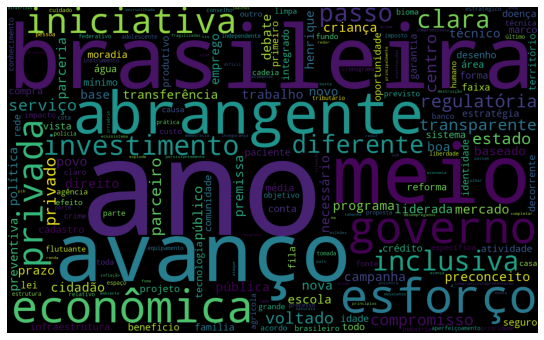

In [39]:
# concatenar as palavras
all_summary = " ".join(s for s in conteudo_limpo)
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1300, height=800).generate(all_summary)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);
#wordcloud.to_file("airbnb_summary_wordcloud.png")

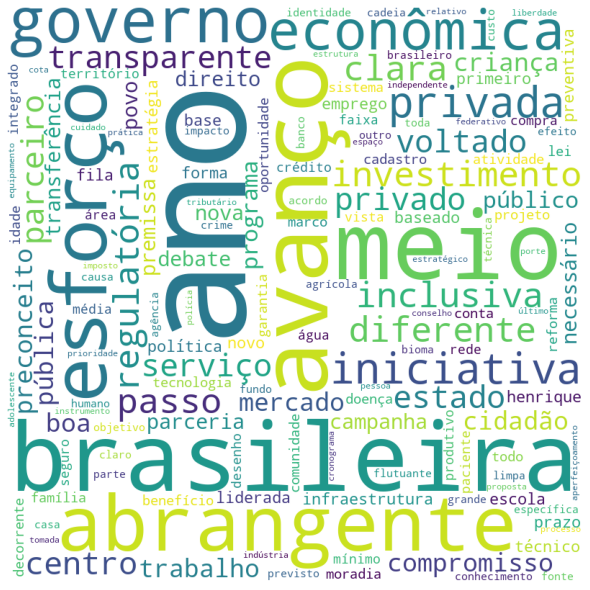

In [40]:
# Fazer nuvem de palavra (wordcloud)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_summary)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()